In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
latency_cols = ["start", "end", "id", "value", "arrival"]
ref_col = "end"

waitTime = "100"
loc = "datasets/NES/021123/monitoring"

bottom_up_no_stress_dir = loc + "/bottomUpWithMonitoringSourceThreeLevel/bottomUpWithMonitoringSourceThreeLevel.out"
bottom_up_stress_dir = loc + "/bottomUpWithMonitoringSourceThreeLevel_stressed/bottomUpWithMonitoringSourceThreeLevel.out"

top_down_no_stress_dir = loc + "/topDownWithMonitoringSourceThreeLevel/topDownWithMonitoringSourceThreeLevel.out"
top_down_stress_dir = loc + "/topDownWithMonitoringSourceThreeLevel_stressed/topDownWithMonitoringSourceThreeLevel.out"

nemo_no_stress_dir = loc + "/nemoPlacementWithMonitoringSourceThreeLevel/nemoPlacementWithMonitoringSourceThreeLevel.out"
nemo_stress_dir = loc + "/nemoPlacementWithMonitoringSourceThreeLevel_stressed/nemoPlacementWithMonitoringSourceThreeLevel.out" 

mst_no_stress_dir = loc + "/bottomUpWithMonitoringSourceMst/bottomUpWithMonitoringSourceMst.out"
mst_stress_dir = loc + "/bottomUpWithMonitoringSourceMst_stressed/bottomUpWithMonitoringSourceMst.out"

chain_no_stress_dir = loc + "/bottomUpWithMonitoringSourceChain/bottomUpWithMonitoringSourceChain.out"
chain_stress_dir = loc + "/bottomUpWithMonitoringSourceChain_stressed/bottomUpWithMonitoringSourceChain.out"

measurements = {
    #"mst": mst_no_stress_dir,
    #"mst stress": mst_stress_dir,
    #"chain": chain_no_stress_dir,
    #"chain stress": chain_stress_dir,
    "top-down": top_down_no_stress_dir,
    "top-down stress": top_down_stress_dir,
    "bottom-up": bottom_up_no_stress_dir,
    "bottom-up stress": bottom_up_stress_dir,
    "nemo": nemo_no_stress_dir,
    "nemo stress": nemo_stress_dir
}

color_list = sns.color_palette(n_colors=len(measurements))
color_dict = {}
i = 0
for k in measurements.keys():
    color_dict[k] = color_list[i]
    i = i + 1

# this dict contains the latency measurements of each approach
latency_results = {}

## Latency

In [21]:
for k, m_loc in measurements.items():
    print(k, m_loc)
    df = pd.read_csv(m_loc, skiprows=1, names=latency_cols)
    df["latency"] = df["arrival"] - df[ref_col]
    latencies = df["latency"].to_list()
    latency_results[k] = latencies

top-down datasets/NES/021123/monitoring/topDownWithMonitoringSourceThreeLevel/topDownWithMonitoringSourceThreeLevel.out
top-down stress datasets/NES/021123/monitoring/topDownWithMonitoringSourceThreeLevel_stressed/topDownWithMonitoringSourceThreeLevel.out
bottom-up datasets/NES/021123/monitoring/bottomUpWithMonitoringSourceThreeLevel/bottomUpWithMonitoringSourceThreeLevel.out
bottom-up stress datasets/NES/021123/monitoring/bottomUpWithMonitoringSourceThreeLevel_stressed/bottomUpWithMonitoringSourceThreeLevel.out
nemo datasets/NES/021123/monitoring/nemoPlacementWithMonitoringSourceThreeLevel/nemoPlacementWithMonitoringSourceThreeLevel.out
nemo stress datasets/NES/021123/monitoring/nemoPlacementWithMonitoringSourceThreeLevel_stressed/nemoPlacementWithMonitoringSourceThreeLevel.out


top-down 2703
top-down stress 2682
bottom-up 2408
bottom-up stress 2408
nemo 2408
nemo stress 2404


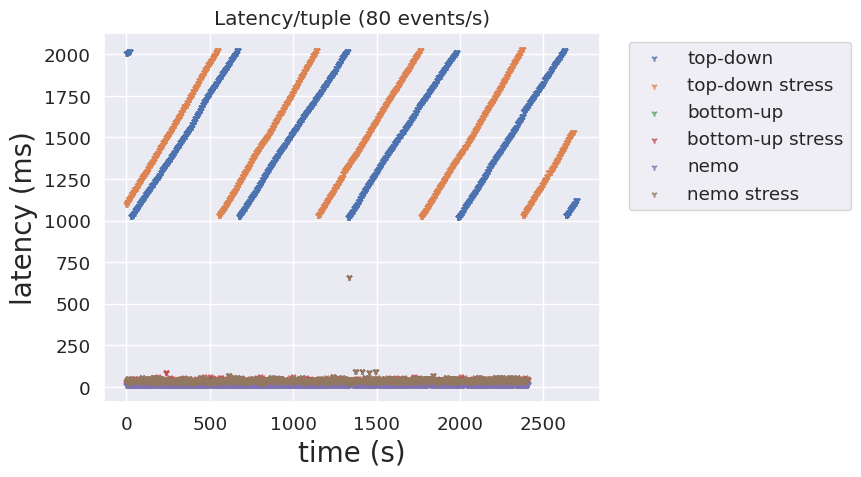

In [22]:
# create a scatter plot
i = 1
for k, v in latency_results.items():
    print(k, len(v))
    plt.scatter([i for i in range(len(v))], v, label=k, s=20, alpha=0.8, marker="1", color=color_dict[k])
    i = i + 1

# set the axis labels and title
plt.xlabel('time (s)', fontsize=20)
plt.ylabel('latency (ms)', fontsize=20)

# Set the legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

# show the plot
plt.title('Latency/tuple (80 events/s)')
plt.show()

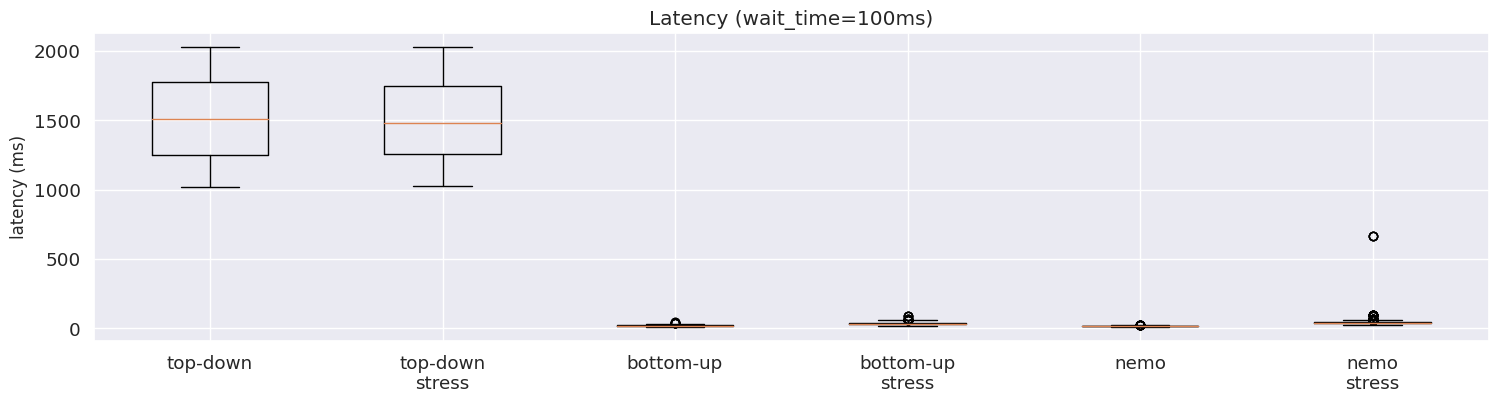

In [23]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(18, 4))

# Extract the keys and values from the measurements dictionary
labels = latency_results.keys()
values = latency_results.values()

# Create the box plots for each key-value pair
ax.boxplot(values)

# Format x-tick labels with line breaks for the second word after a space
formatted_labels = [label.replace(' ', '\n', 1) for label in labels]
ax.set_xticklabels(formatted_labels)

# Set the title
plt.ylabel('latency (ms)', fontsize=12)

plt.savefig("plots/NES/latency_boxplot.svg", bbox_inches = "tight")

# Display the plot
plt.title("Latency (wait_time={0}ms)".format(waitTime))
plt.show()

In [24]:
percentiles = [85, 90, 95, 99]
approaches = []
values = []
perc_label = []

for k, v in latency_results.items():
    #if "top-down" in k:
    #    continue
    for pval in percentiles:
        perc = np.percentile(v, pval).round(2)
        approaches.append(k)
        values.append(perc)
        perc_label.append(pval)

df_dict = dict(approach=approaches, value=values, percentile=perc_label)
df = pd.DataFrame(df_dict)

In [25]:
df

,approach,value,percentile
0,top-down,1885.00,85
1,top-down,1933.00,90
2,top-down,1985.00,95
3,top-down,2018.00,99
4,top-down stress,1866.00,85
5,top-down stress,1920.00,90
6,top-down stress,1980.80,95
7,top-down stress,2024.76,99
8,bottom-up,24.00,85
9,bottom-up,25.00,90


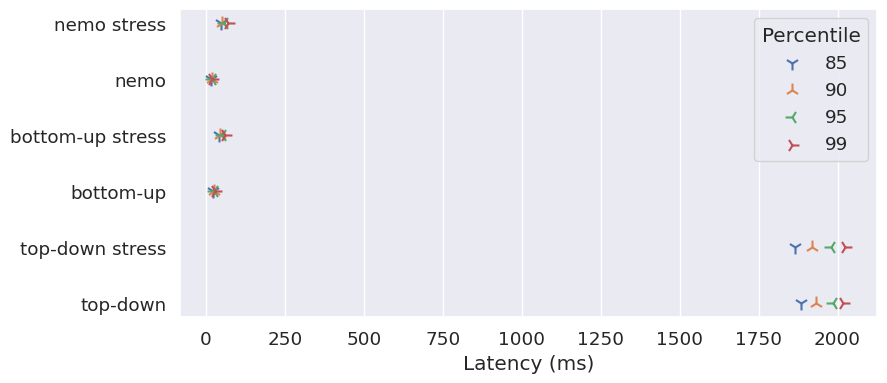

In [26]:
# Create the dot plot using matplotlib
fig, ax = plt.subplots(figsize=(9, 4))
color_list = sns.color_palette(n_colors=len(percentiles))
i = 0
for perc in percentiles:
    mask = df["percentile"] == perc
    ax.scatter(df.loc[mask, "value"], df.loc[mask, "approach"], color=color_list[i], label=str(perc), marker=str(i+1), s=100)
    i = i + 1

ax.set_xlabel("Latency (ms)")
ax.legend(title="Percentile")
ax.grid(axis='y')

plt.show()

In [27]:
percentiles = [85, 90, 95, 99]
value_dict = {}

for k, v in latency_results.items():
    values = []
    for pval in percentiles:
        perc = np.percentile(v, pval).round(2)
        values.append(perc)
    value_dict[k] = values

df = pd.DataFrame.from_dict(value_dict, columns=percentiles, orient='index').astype(int)
df

,85,90,95,99
top-down,1885,1933,1985,2018
top-down stress,1866,1920,1980,2024
bottom-up,24,25,26,29
bottom-up stress,43,46,50,59
nemo,17,18,18,20
nemo stress,49,51,56,69


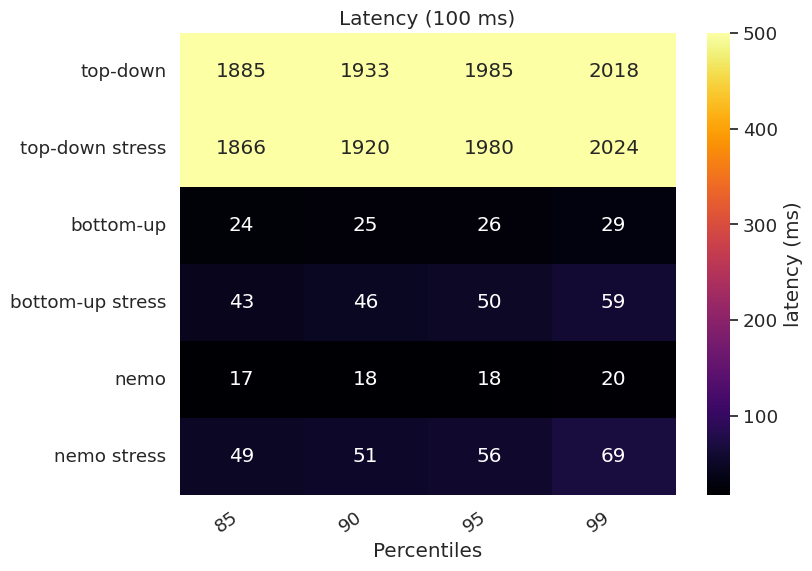

In [28]:
# create the heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(df, annot=True, cmap='inferno', vmax=500, cbar_kws={'label': 'latency (ms)'}, cbar=True, fmt='g')

# Rotate xtick labels
plt.xticks(rotation=35, ha='right')
plt.xlabel("Percentiles")
# show the plot
plt.savefig("plots/NES/latency_heatmap_perc.svg", bbox_inches='tight')
plt.title("Latency ({0} ms)".format(waitTime))
plt.show()